In [1]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings
from tqdm import tqdm

In [38]:
# execute if notebook is ran on google colab
from google.colab import drive

ModuleNotFoundError: No module named 'google'

In [ ]:
drive.mount('/content/gdrive/')

In [2]:
warnings.filterwarnings('ignore')

In [3]:
CSV_PATH = 'data/UrbanSound8K.csv'
DATA_PATH = 'data'
PICKLE_PATH = 'data.pkl'

In [4]:
df = pd.read_csv(CSV_PATH)

In [5]:
audio, sample_rate = librosa.load(os.path.join(DATA_PATH, 'fold1', '101415-3-0-2.wav'), sr=None)

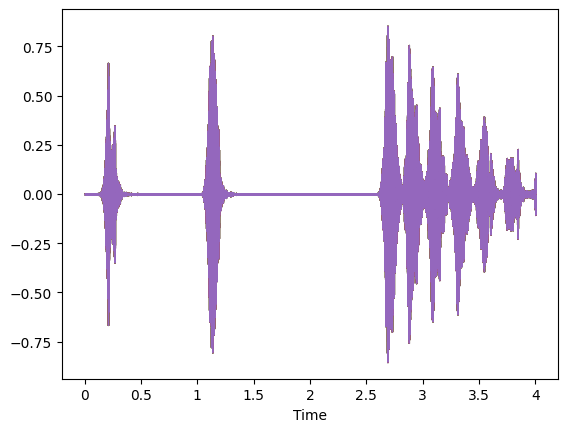

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [116]:
librosa.display.waveshow(audio, sr=sample_rate)
plt.show()
ipd.Audio(os.path.join(DATA_PATH, 'fold1', '101415-3-0-2.wav'))

In [ ]:
df.shape

(8732, 8)

In [6]:
def feature_extractor(file: str):
    x, sr = librosa.load(file)
    x_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
    x_mfcc = np.mean(x_mfcc.T, axis=0)
    return x_mfcc


In [7]:
sound = []
label = []
for i in tqdm(range(df.shape[0])):
    path   = os.path.join(DATA_PATH + '/fold' + str(df.fold[i]) + '/' + df.slice_file_name[i])
    x_mfcc = feature_extractor(path)
    sound.append(x_mfcc)
    label.append(df['class'][i])

100%|██████████| 8732/8732 [01:33<00:00, 93.24it/s] 


In [8]:
# create new dataframe
data = pd.DataFrame({'features': sound, 'label': label})
data

,features,label
0,"[-211.93698, 62.581207, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.65879, 50.690277, ...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.751076, 26.816486,...",car_horn
8730,"[-336.92386, 115.313896, -44.84709, 24.968985,...",car_horn


In [9]:
# pickle it up
data.to_pickle(PICKLE_PATH)